In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([raw.values[::2, :], raw.values[1::2, :2]])
target = raw.values[1::2, 2]

cols = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
        "RAD","TAX","PTRATIO","B","LSTAT"]
df = pd.DataFrame(data, columns=cols)
df["MEDV"] = target

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
print(df.shape)

(506, 14)


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


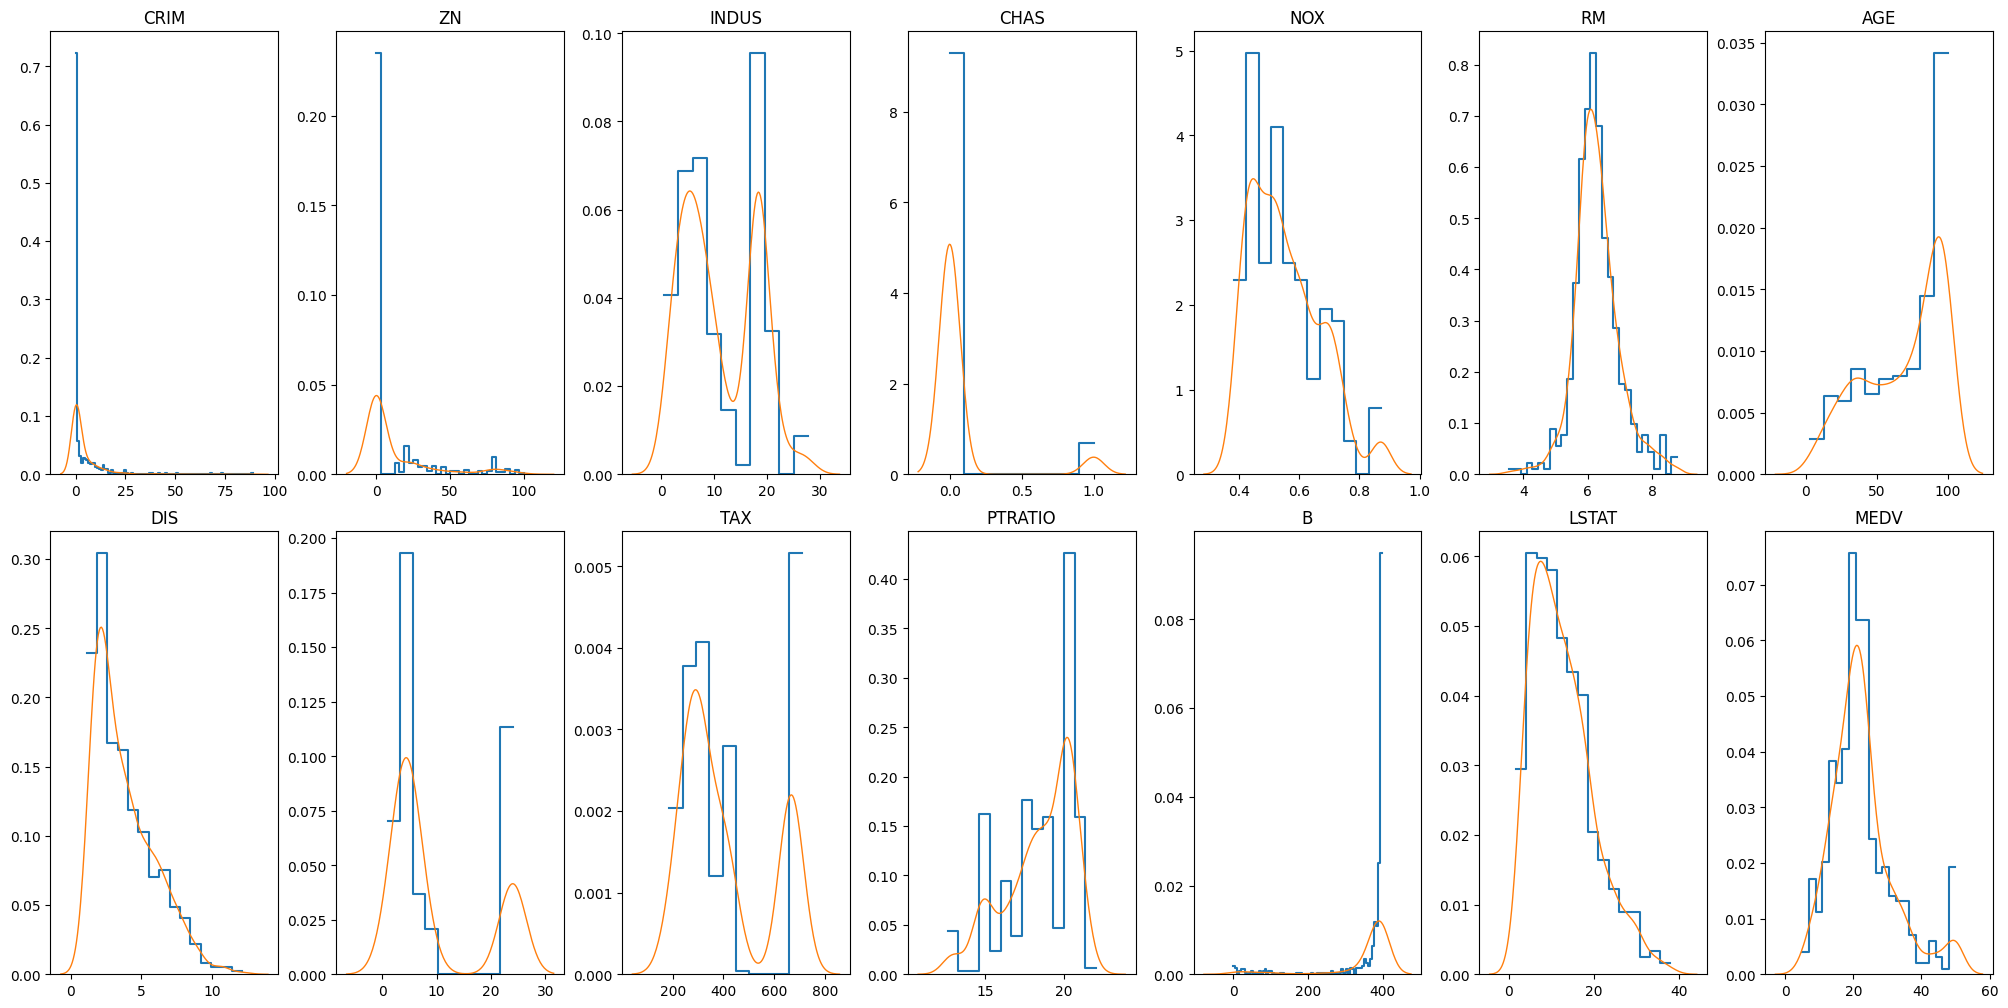

In [14]:
cols = df.columns
n = len(cols)
ncols = 7
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axs = np.array(axs).ravel()

for i, col in enumerate(cols):
    x = pd.to_numeric(df[col], errors="coerce").dropna()
    ax = axs[i]
    sns.histplot(x, ax=ax, stat="density", bins="auto", element="step", fill=False)
    if x.nunique() > 1:
        sns.kdeplot(x, ax=ax, lw=1)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.8)
plt.show()


<Axes: >

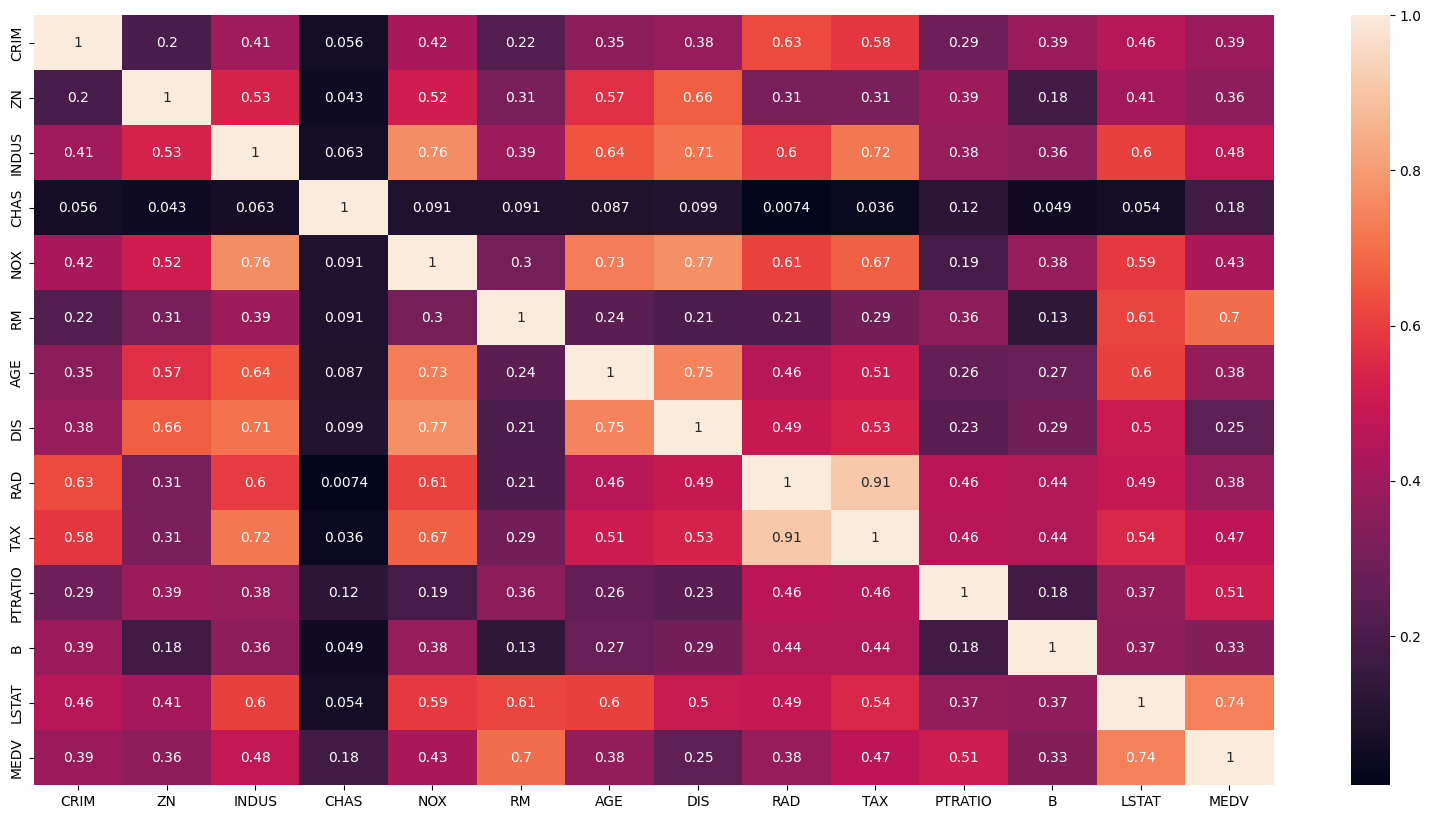

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [33]:
features = ["RM", "LSTAT"]
X = df[features].values.astype(float)
y = df["MEDV"].values.astype(float)

print("X shape:", X.shape, "| y shape:", y.shape)

X shape: (506, 2) | y shape: (506,)


In [42]:
pipe = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        loss="squared_error",
        penalty="l2",
        alpha=1e-4,
        learning_rate="optimal",
        max_iter=3000,
        tol=1e-8,
        random_state=0
    )
)

In [43]:
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(learning_rate='optimal', max_iter=3000,
                              random_state=0, tol=1e-08))])

In [44]:
y_pred_tr = pipe.predict(X_tr)
y_pred_te = pipe.predict(X_te)
print("Train R^2:", r2_score(y_tr, y_pred_tr))
print("Test  R^2:", r2_score(y_te, y_pred_te))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_te, y_pred_te)))

Train R^2: 0.1960666630270762
Test  R^2: 0.20411742139237254
Test  RMSE: 8.115608786301195


In [45]:
scaler = pipe.named_steps["standardscaler"]
sgd = pipe.named_steps["sgdregressor"]
w_std = sgd.coef_
b_std = sgd.intercept_[0]

w_eff = w_std / scaler.scale_
b_eff = b_std - np.sum(w_std * scaler.mean_ / scaler.scale_)

print(f"ŷ = {b_eff:.3f} + {w_eff[0]:.3f}*{features[0]} + {w_eff[1]:.3f}*{features[1]}")

ŷ = 35.956 + -1.318*RM + -0.769*LSTAT


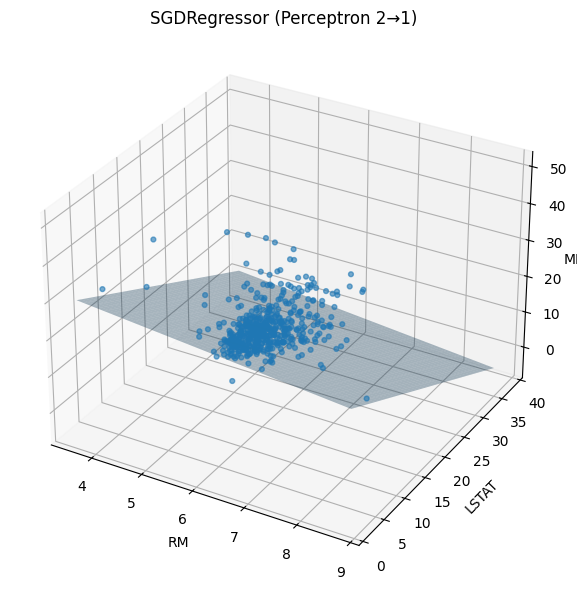

In [46]:
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 40)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 40)
xx, yy = np.meshgrid(x1, x2)
grid = np.c_[xx.ravel(), yy.ravel()]
zz = pipe.predict(grid).reshape(xx.shape)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, s=12, alpha=0.6, label="data")
ax.plot_surface(xx, yy, zz, alpha=0.35, edgecolor='none')

ax.set_xlabel(features[0]); ax.set_ylabel(features[1]); ax.set_zlabel('MEDV')
ax.set_title("SGDRegressor (Perceptron 2→1)")
plt.tight_layout(); plt.show()